In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [151]:
df = pd.read_csv('raises.csv')

# Exploring data

Data source https://defillama.com/raises

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4669 non-null   object 
 1   Timestamp        4669 non-null   int64  
 2   Date             4669 non-null   object 
 3   Amount Raised    4545 non-null   float64
 4   Round            4088 non-null   object 
 5   Description      4426 non-null   object 
 6   Lead Investor    1898 non-null   object 
 7   Category         2684 non-null   object 
 8   Source           1740 non-null   object 
 9   Valuation        189 non-null    object 
 10  Chains           835 non-null    object 
 11  Other Investors  2446 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 437.8+ KB


In [153]:
df['Valuation'].describe()

count     189
unique     97
top       100
freq       13
Name: Valuation, dtype: object

Looking at the caluation column, we can see that it has too many missing values and thus we can use it 

# Cleaning data

In [154]:
df.drop(['Source', 'Timestamp'], axis=1, inplace=True)

In [155]:
df['Amount Raised'].dtype

dtype('float64')

In [156]:
df['Amount Raised'] = df['Amount Raised'] / 1000000

In [157]:
data = df.copy()

In [158]:
data

,Name,Date,Amount Raised,Round,Description,Lead Investor,Category,Valuation,Chains,Other Investors
0,Llama,2023-11-06,6.000,Seed,Access control and governance platform for sma...,Founders Fund + Electric Capital,DAO infrastructure,NaN,NaN,Stani Kulechov + Viktor Bunin + Elad Gil + San...
1,Intmax,2023-11-03,NaN,Strategic,stateless zkRollup,NaN,L2,NaN,Ethereum,LD Capital + GMO AI & Web3 + Kx Technology Fun...
2,Layer N,2023-11-03,NaN,Strategic,rollup network designed to scale financial app...,BlackPine,L2,NaN,Ethereum,NaN
3,Toposware,2023-11-02,5.000,Seed+,Zero knowledge infrastructure,Evolution Equity Partners,Infrastructure,NaN,NaN,Triatomic Capital + K2 Access Fund + Sandeep N...
4,Trips,2023-11-02,2.500,Pre-Seed,"IP Protection, Authentication and Monetization...",NaN,NaN,NaN,NaN,Shima Capital + Animal Capital + Blackwood Ven...
...,...,...,...,...,...,...,...,...,...,...
4664,Xapo,2014-07-08,20.000,Series A,Xapo combines the convenience of an everyday b...,NaN,Infrastructure,NaN,NaN,Blockchain Capital + David Marcus + Emergence ...
4665,Axoni,2014-06-25,2.770,NaN,"Axoni offers blockchain infrastructure, distri...",NaN,Infrastructure,NaN,NaN,NaN
4666,BitGo,2014-06-16,12.000,Series A,BitGo is an institutional digital asset financ...,NaN,CeFi,NaN,NaN,A-Grade Investments + Ben Davenport + Bill Lee...
4667,BitFlyer,2014-06-10,1.172,Seed,BitFlyer is a bitcoin exchange and marketplace...,NaN,Centralized Exchange,NaN,NaN,B Dash Ventures + East Ventures + Incubate Fund


# Creating new columns (year, months)

In [159]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [160]:
pd.DataFrame(data.groupby(['Year'])['Amount Raised'].sum())

,Amount Raised
Year,
2014,246.0370
2015,483.9800
2016,1055.4510
2017,6299.1080
2018,16241.6250
2019,4568.6500
2020,4395.4600
2021,36362.2450
2022,22124.1419


# Raised by month and year
To see if there are any paterns in investment seasonality

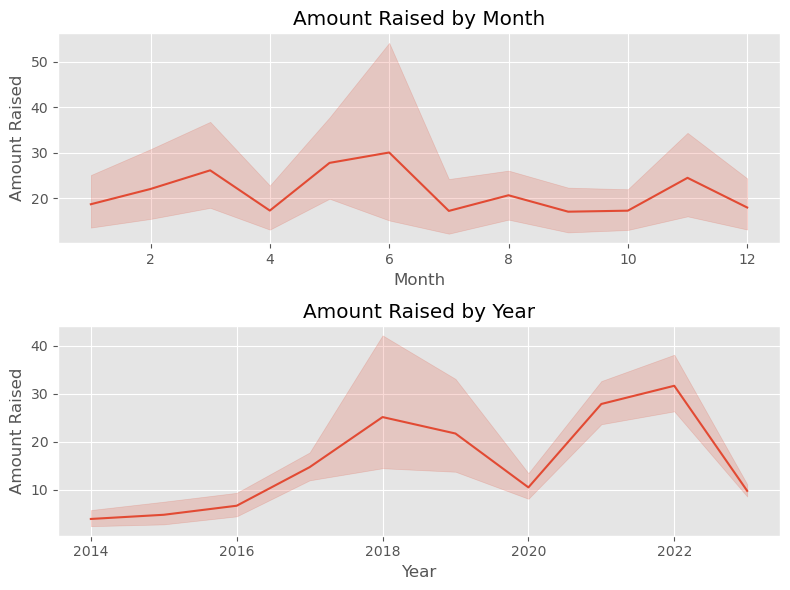

In [161]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
for index, _ in enumerate(['Month', 'Year']):
    
    sns.lineplot(x=_,
                    y='Amount Raised',
                    data=data,
                    ax=axes[index]
                    )
    axes[index].set_title(f'Amount Raised by {_}')
    axes[index].set_xlabel(_)

plt.tight_layout()
plt.show()

# Funding by rounds

In [162]:
df['Round'].unique()

array(['Seed', 'Strategic ', 'Seed+', 'Pre-Seed', nan, 'Private',
       'Series A', 'pre-Series A ', 'Series A+', 'Public token sale',
       'Series B', 'Equity + Token', 'Token Pre-Sale', 'Angel Round',
       'pre-Series A', 'Seed and Strategic', 'Strategic Round',
       'Venture Round', 'Series C', 'Private token sale', 'Private Round',
       'Series C+', 'Presale', 'Private + Public', 'Pre-seed+',
       'Institutional', 'Series B1', 'SAFT', 'IFO', 'Preseed',
       'TwelveFold Auction', 'Series pre-A', 'IPO', 'Series A-4',
       'Series A2', 'Equity', 'Convertible note issuance', 'Bridge Round',
       'Strategic Private Sale', 'Private Equity', 'Ecosystem Round',
       'Ecosystem Foundation raise', 'Public Offering Common Stock',
       'Series A & B', 'DAO round', 'Treasury Diversification',
       '3rd round', 'Series D', 'Loan', 'Post-IPO Equity', 'Series F',
       'pre-Series B', 'IEO', 'ICO', 'Seed & Private', 'Grant',
       'Series C-1', 'Series E', 'Post-IPO Debt',

### Cleaning round column

In [163]:
def categorize_round(round_value):
    # First, check if the value is a string and convert it to lowercase
    if isinstance(round_value, str):
        round_value = round_value.lower()

        # Apply your conditions to categorize the round
        if 'seed' in round_value:
            return 'seed'
        elif 'series' in round_value:
            return 'series'
        elif any(x in round_value for x in ['public', 'ipo', 'ico', 'dyco', 'coinlist', 'crowdfunding']):
            return 'public round'
        elif any(x in round_value for x in ['institutional', 'private', 'equity', 'venture', 'corporate', 'funding round']):
            return 'institutional'
        elif any(x in round_value for x in ['3rd round', 'twelvefold auction', 'loan', 'ieo']):
            return 'unknown'
        else:
            return round_value  # Return the value as is if it doesn't match any category
    else:
        # If the value is not a string, it's considered as 'unknown'
        return 'unknown'

# Apply the function to the column
df['cleaned_round'] = df['Round'].apply(categorize_round)


In [164]:
df['Round'] = df['Round'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['Round'] = df['Round'].fillna('unknown')

df.loc[df['Round'].str.contains('seed'), 'Round'] = 'seed'
df.loc[df['Round'].str.contains('series'), 'Round'] = 'series'
df.loc[df['Round'].str.contains('public|ipo|ico|dyco|coinlist|crowdfunding'), 'Round'] = 'public round'
df.loc[df['Round'].str.contains('institutional|private|equity|venture|corporate|funding round'), 'Round'] = 'institutional'
df.loc[df['Round'].str.contains('3rd round|twelvefold auction|loan|ieo'), 'Round'] = 'unknown'

In [165]:
df['Round'].unique()

array(['seed', 'strategic ', 'unknown', 'institutional', 'series',
       'public round', 'token pre-sale', 'angel round', 'strategic round',
       'presale', 'saft', 'ifo', 'convertible note issuance',
       'bridge round', 'ecosystem round', 'ecosystem foundation raise',
       'dao round', 'treasury diversification', 'grant', 'debt financing',
       'secondary market'], dtype=object)

In [166]:
raised_round = df.groupby('Round')['Amount Raised'].agg(['count', 'sum']).sort_values(by='sum', ascending=False)

In [167]:
raised_round

,count,sum
Round,,
series,1041,40152.3200
public round,523,21695.4780
unknown,571,10939.9700
seed,1916,8593.3019
institutional,196,6220.4570
debt financing,46,3260.7330
ecosystem foundation raise,20,2625.0000
strategic,70,1061.7800
convertible note issuance,39,983.8660


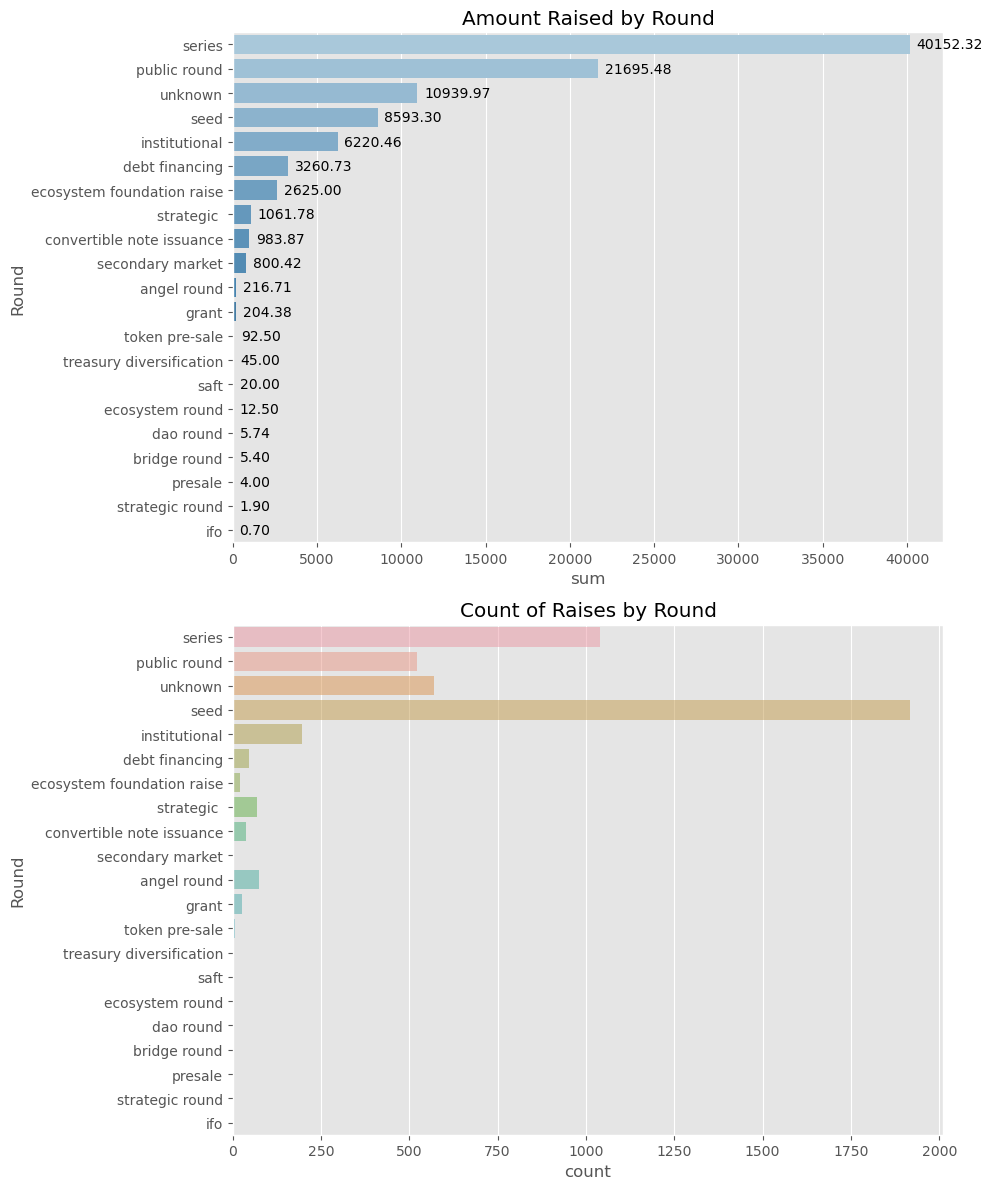

In [168]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Amount Raised by Round
sns.barplot(data=raised_round, 
            x='sum', 
            y=raised_round.index, 
            palette='Blues_d',
            ax=axes[0])
axes[0].set_title('Amount Raised by Round')

# Plot 2: Count of Raises by Round
sns.barplot(data=raised_round,
            x='count',
            y=raised_round.index,
            alpha=0.5,
            ax=axes[1])
axes[1].set_title('Count of Raises by Round')

# Annotate the Amount Raised values
for i, (index, row) in enumerate(raised_round.iterrows()):
    axes[0].annotate(f"{row['sum']:.2f}", 
                     xy=(row['sum'], i), 
                     xytext=(5, 0), 
                     textcoords="offset points", 
                     ha='left', 
                     va='center')

plt.tight_layout()
plt.show()


In [169]:
data = df.copy()

In [170]:
data['Other Investors'] = data['Other Investors'].fillna('None')

In [171]:
data['Other Investors'] = data['Other Investors'].apply(lambda x: x.lower() if isinstance(x, str) else x)
data['Other Investors'] = data['Other Investors'].str.replace(' ', '')

In [172]:
data['Other Investors'].str.split('+', expand=True).stack().value_counts().head(20)

none                   2223
coinbaseventures        182
dcg                     132
panteracapital           94
alamedaresearch          91
animocabrands            88
blockchaincapital        74
cmtdigital               71
fenbushicapital          71
hashed                   70
ngcventures              69
a16z                     68
thespartangroup          67
shimacapital             63
balajisrinivasan         63
au21capital              59
robotventures            56
coinfund                 56
multicoincapital         54
arringtonxrpcapital      54
Name: count, dtype: int64

In [173]:
investor = data.loc[data['Other Investors'] != 'none', 'Other Investors'].str.split('+', expand=True).stack().value_counts()
investor = pd.DataFrame(investor).reset_index()

In [174]:
investor.columns = ['Investor', 'Count']

### 30 most active investors

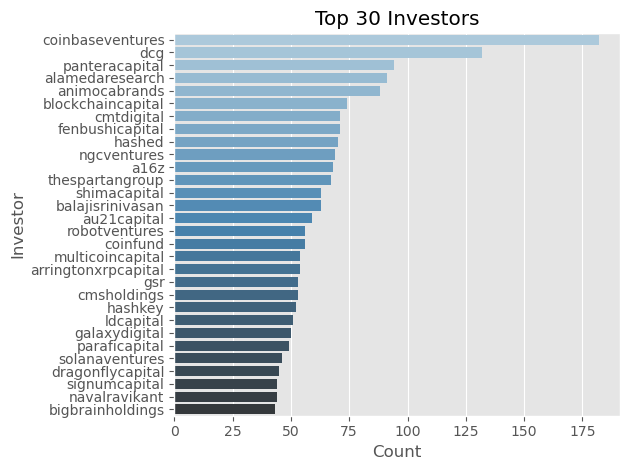

In [175]:
sns.barplot(data=investor.head(30),
            x='Count',
            y='Investor',
            palette='Blues_d')


plt.title('Top 30 Investors')
plt.tight_layout()
plt.show()

# Exploring amounts raised by category 

In [176]:
sector = df.groupby('Category', as_index=False)['Amount Raised'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).head(20)

In [177]:
sector['ratio'] = sector['sum'] / sector['count']
sector

,Category,count,sum,ratio
27,L1,186,10787.1080,57.995204
24,Infrastructure,462,10068.3370,21.792937
6,CeFi,186,9476.3140,50.947925
8,Centralized Exchange,137,6924.0800,50.540730
15,DeFi,470,5194.0849,11.051244
19,Gaming,183,3973.8160,21.714842
32,Mining,69,3534.6050,51.226159
33,NFT,200,2482.5440,12.412720
46,Trading,115,1469.5520,12.778713
1,Analytics,83,1051.8080,12.672386


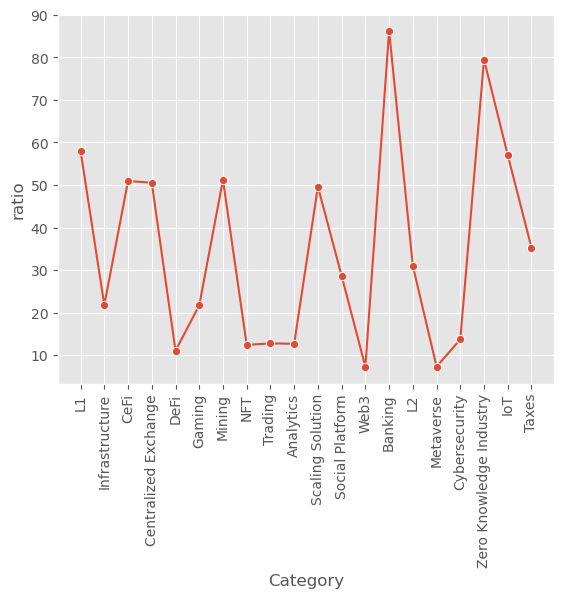

In [178]:
sns.lineplot(data=sector,
                x='Category',
                y='ratio',
                marker='o')
plt.xticks(rotation=90);

In [179]:
sector.set_index('Category', inplace=True)

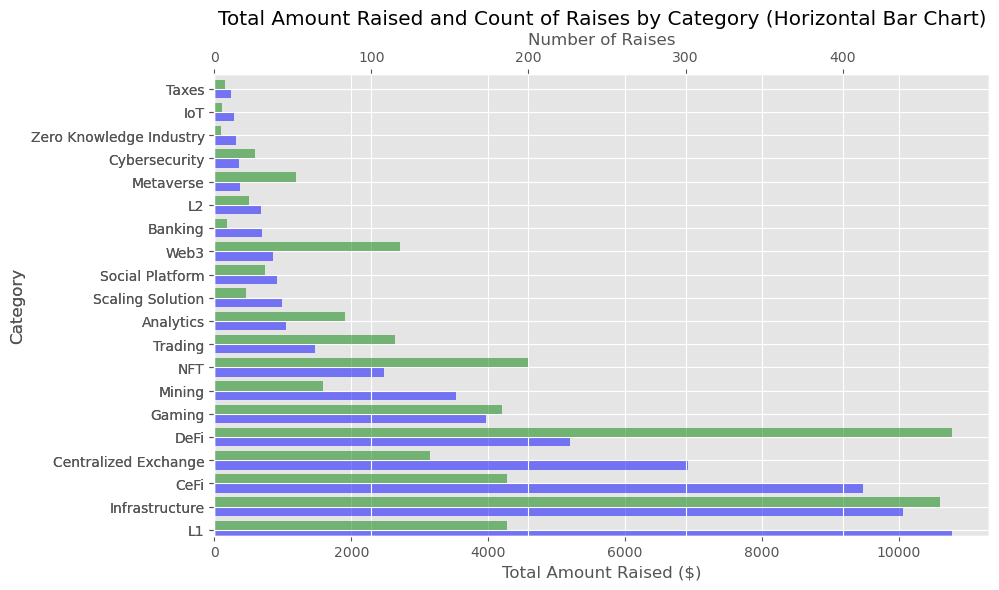

In [180]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Horizontal bar plot for 'Amount Raised'
sector['sum'].plot(kind='barh', ax=ax1, color='blue', position=1, width=0.4, alpha=0.5)
ax1.set_ylabel('Category')
ax1.set_xlabel('Total Amount Raised ($)')
ax1.tick_params(axis='x')

# Creating a secondary axis for the count
ax2 = ax1.twiny()
sector['count'].plot(kind='barh', ax=ax2, color='green', position=0, width=0.4, alpha=0.5)
ax2.set_xlabel('Number of Raises')
ax2.tick_params(axis='x')

# Set title
ax1.set_title('Total Amount Raised and Count of Raises by Category (Horizontal Bar Chart)')
# Show the plot
plt.show()

# See how the investment amount were changing by category in each year

In [181]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [182]:
year_cat = data.groupby(['Year', 'Category'],
                         as_index=False)['Amount Raised'].sum().sort_values(by=['Year', 'Amount Raised'], 
                                                                            ascending=[True, False])

In [183]:
year_cat.head(20).sort_values(by=['Year', 'Amount Raised'], ascending=[True, False])

,Year,Category,Amount Raised
3,2014,Infrastructure,91.138
2,2014,Centralized Exchange,36.647
4,2014,L1,22.980
7,2014,Payments,18.000
5,2014,Mining,14.000
1,2014,CeFi,13.243
9,2014,Trading,10.902
6,2014,NFT,0.914
8,2014,Storage,0.582
0,2014,Analytics,0.100


In [184]:
import plotly.express as px

In [230]:
import plotly.express as px

fig = px.bar(year_cat, 
             x='Amount Raised', 
             y='Category', 
             animation_frame='Year', 
             orientation='h',
             range_x=[0, year_cat['Amount Raised'].max() * 1.1],
             title='Annual Amount Raised by Category Over Years',
             color='Category')

fig.update_layout(yaxis={'categoryorder':'total ascending'},
                  xaxis_title='Amount Raised (in Millions)',
                  yaxis_title='Category',
                  legend_title='Category',
                  template='plotly_white',
                  height=500,
                  width=1000,
                  autosize=True)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000  
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 500

fig.show()


In [186]:
top_20_cat = data.groupby('Category')['Amount Raised'].sum().sort_values(ascending=False).head(20).to_frame()

In [187]:
annual_category_totals = data.groupby(['Year', 'Category'])['Amount Raised'].sum().reset_index().sort_values(by=['Year', 'Amount Raised'], ascending=[True, False])
pivot_table = annual_category_totals.pivot(index='Year', columns='Category', values='Amount Raised').fillna(0)
pivot_table.head()

Category,AI,Analytics,Banking,Betting,Blockchain-as-a-Service,CEX,CeFi,CeFi Yield,Centralized Exchange,Cloud Security,...,Smart contract security,Social Platform,Storage,Supply Chain,Taxes,Trading,Travel,Voting,Web3,Zero Knowledge Industry
Year,,,,,,,,,,,,,,,,,,,,,
2014,0.0,0.10,0.0,0.0,0.0,0.0,13.243,0.0,36.647,0.0,...,0.00,0.00,0.582,0.00,0.0,10.902,0.0,0.0,0.00,0.0
2015,0.0,7.22,1.4,0.0,0.0,0.0,99.122,0.0,82.419,0.0,...,0.00,0.00,0.000,0.00,0.0,2.000,0.0,0.0,2.50,0.0
2016,0.0,6.60,0.0,0.0,0.0,0.0,65.000,0.0,44.045,0.0,...,0.00,1.00,1.800,0.00,0.0,54.738,0.5,0.0,0.00,0.0
2017,0.0,1.55,16.7,0.0,0.0,0.0,150.644,0.0,251.889,0.0,...,2.50,12.00,33.300,1.54,0.0,132.222,1.5,2.3,7.50,0.0
2018,0.0,35.24,21.9,0.0,0.0,0.0,703.720,0.0,439.890,2.4,...,0.12,603.42,8.700,62.50,1.5,422.010,0.0,0.0,13.57,0.0


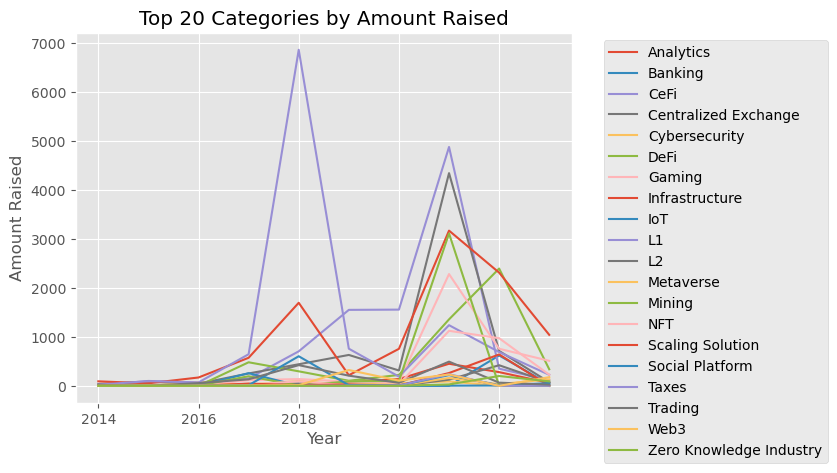

In [197]:
for i in pivot_table.columns:
    if i in top_20_cat.index:
        sns.lineplot(data=pivot_table[i], label=i)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 20 Categories by Amount Raised')
plt.ylabel('Amount Raised')
plt.xlabel('Year')
plt.show()

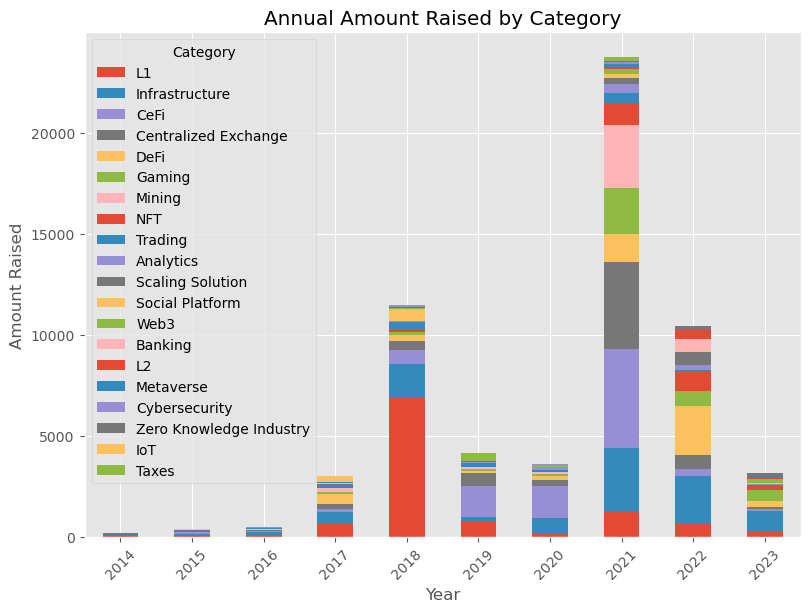

In [ ]:
pivot_table.loc[:, top_20_cat.index].plot(kind='bar', 
                                          stacked=True, 
                                          figsize=(8, 6))
plt.tight_layout()
plt.xticks(rotation=45)
plt.title('Annual Amount Raised by Category')
plt.xlabel('Year')
plt.ylabel('Amount Raised')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<Axes: xlabel='Year', ylabel='Category'>

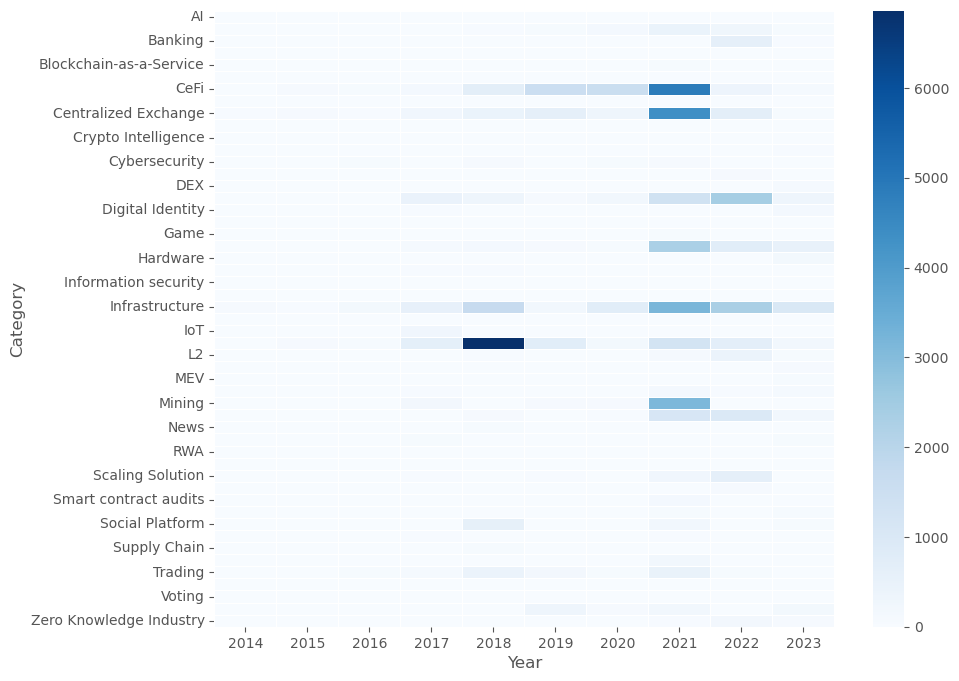

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table.T, 
            cmap='Blues', 
            annot=False, 
            fmt='.0f', 
            linewidths=0.5, 
            linecolor='white'
            )


# Rank of Investors to lead the rounds 

In [ ]:
lead_investors = df.loc[~df['Lead Investor'].isna()]

In [ ]:
lead_investors['Lead Investor'] = lead_investors['Lead Investor'].apply(lambda x: x.lower() if isinstance(x, str) else x)
lead_investors['Lead Investor'] = lead_investors['Lead Investor'].str.replace(' ','')

In [ ]:
top_lead_investors = lead_investors['Lead Investor'].str.split('+', expand=True).stack().value_counts().head(20)
top_lead_df = pd.DataFrame(top_lead_investors).reset_index()
top_lead_df.columns = ['Investor', 'Count']

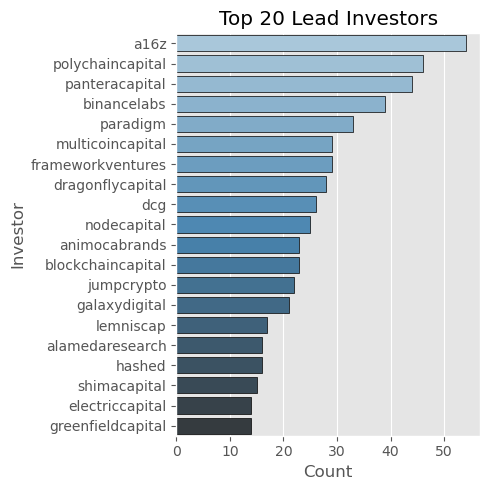

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

ax = sns.barplot(data=top_lead_df,
            x='Count',
            y='Investor',
            palette='Blues_d',
            )
for patch in ax.patches:
    patch.set_edgecolor('black')

plt.title('Top 20 Lead Investors')
plt.tight_layout()
plt.show()

# Top categories invested by top funds

In [194]:
top_investors = df['Other Investors'].str.split('+', expand=True).stack().value_counts().head(40).to_frame()

In [208]:
from tqdm import tqdm

In [224]:
df[(df['Other Investors'].str.contains('Coinbase Ventures')) & (df['Category'].str.contains('L1'))]

,Name,Date,Amount Raised,Round,Description,Lead Investor,Category,Valuation,Chains,Other Investors,cleaned_round
1232,Aptos,2022-03-16,200.00,strategic,NaN,a16z,L1,NaN,Aptos,Multicoin Capital + Katie Haun + ParaFi Capita...,strategic
1248,Espresso Systems,2022-03-08,32.00,seed,Privacy focussed L1,Greylock + Electric Capital,L1,NaN,NaN,Sequoia Capital + Blockchain Capital + Slow Ve...,seed
2277,Anoma Network,2021-04-27,6.75,strategic,L1,Polychain Capital,L1,NaN,NaN,Electric Capital + Coinbase Ventures + FBG Cap...,strategic
2575,Terra,2021-01-26,25.00,unknown,Terra is a price-stable cryptocurrency designe...,NaN,L1,NaN,Terra,Arrington XRP Capital + Coinbase Ventures + CO...,unknown
2633,DeSo Foundation,2021-01-01,200.00,seed,Layer-1 blockchain built to power storage-heav...,NaN,L1,NaN,NaN,a16z + Arrington XRP Capital + Ashton Kutcher ...,seed
2935,FalconX,2020-05-13,17.00,unknown,"FalconX is a blockchain, cryptocurrency, and f...",NaN,L1,NaN,NaN,Accel + Accomplice + Avon Ventures + Cadenza V...,unknown
3181,NEAR Protocol,2019-07-10,12.10,series,NEAR Protocol is a blockchain designed to prov...,NaN,L1,NaN,Near,Accomplice + Amplify Partners + Arrington XRP ...,series
3237,Mina,2019-04-05,15.00,seed,Mina Protocol enables a more secure and privat...,NaN,L1,NaN,NaN,Accomplice + Coinbase Ventures + General Catal...,seed
3412,Spacemesh,2018-09-05,15.00,series,"Spacemesh is a L1 blockchain protocol, focused...",NaN,L1,NaN,NaN,1kx + Arrington XRP Capital + Bain Capital + B...,series
3525,Celo,2018-06-25,6.50,unknown,Celo is an open platform that makes financial ...,NaN,L1,NaN,Celo,a16z + Arianna Simpson + Avichal Garg + Coinba...,unknown


In [211]:
for investor in tqdm(top_investors.index):
    for cat in top_20_cat.index:
        top_investors.loc[investor, cat] = df.loc[(df['Other Investors'].str.contains(investor)) & (df['Category'] == cat), 'Category'].count()
top_investors

100%|██████████| 40/40 [00:01<00:00, 20.88it/s]


,count,L1,Infrastructure,CeFi,Centralized Exchange,DeFi,Gaming,Mining,NFT,Trading,...,Scaling Solution,Social Platform,Web3,Banking,L2,Metaverse,Cybersecurity,Zero Knowledge Industry,IoT,Taxes
Coinbase Ventures,140,9.0,20.0,2.0,4.0,25.0,5.0,0.0,6.0,2.0,...,1.0,3.0,2.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0
DCG,112,7.0,20.0,12.0,3.0,9.0,2.0,0.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
Pantera Capital,66,4.0,6.0,6.0,5.0,8.0,2.0,0.0,1.0,1.0,...,2.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Fenbushi Capital,62,2.0,10.0,1.0,3.0,5.0,5.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
Hashed,58,6.0,7.0,1.0,0.0,12.0,10.0,0.0,3.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Alameda Research,58,2.0,10.0,2.0,2.0,29.0,4.0,0.0,4.0,2.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
NGC Ventures,57,3.0,8.0,0.0,0.0,11.0,5.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
Blockchain Capital,52,6.0,5.0,4.0,3.0,7.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
LD Capital,49,1.0,2.0,1.0,0.0,11.0,6.0,0.0,2.0,0.0,...,1.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
CMS Holdings,48,2.0,2.0,0.0,2.0,22.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# for cat in top_20_cat.index:
#     filtered_df = df[df['Category'] == cat]
#     counts = filtered_df['Other Investors'].str.contains('+'.join(top_investors.index)).sum(level=0)
#     top_investors[cat] = counts

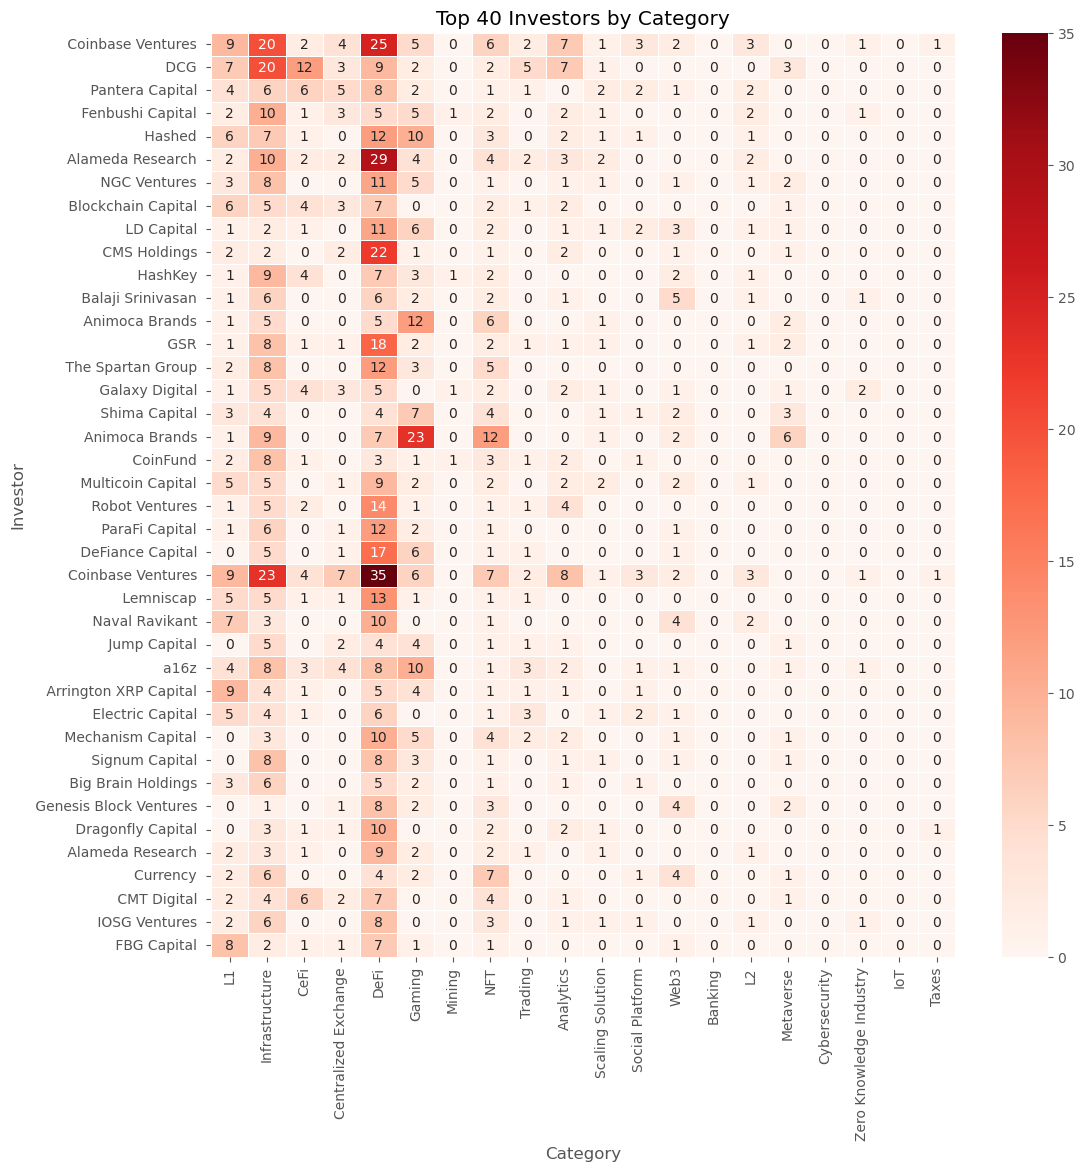

In [229]:
plt.figure(figsize=(12, 12))
sns.heatmap(top_investors.iloc[:, 1:],
            cmap='Reds',
            annot=True,
            fmt='.0f',
            linewidths=0.5,
            linecolor='white'
            )
plt.title('Top 40 Investors by Category')
plt.xlabel('Category')
# plt.xticks(rotation=90)
plt.ylabel('Investor')
plt.show()
            

In [201]:
df

,Name,Date,Amount Raised,Round,Description,Lead Investor,Category,Valuation,Chains,Other Investors,cleaned_round
0,Llama,2023-11-06,6.000,seed,Access control and governance platform for sma...,Founders Fund + Electric Capital,DAO infrastructure,NaN,NaN,Stani Kulechov + Viktor Bunin + Elad Gil + San...,seed
1,Intmax,2023-11-03,NaN,strategic,stateless zkRollup,NaN,L2,NaN,Ethereum,LD Capital + GMO AI & Web3 + Kx Technology Fun...,strategic
2,Layer N,2023-11-03,NaN,strategic,rollup network designed to scale financial app...,BlackPine,L2,NaN,Ethereum,NaN,strategic
3,Toposware,2023-11-02,5.000,seed,Zero knowledge infrastructure,Evolution Equity Partners,Infrastructure,NaN,NaN,Triatomic Capital + K2 Access Fund + Sandeep N...,seed
4,Trips,2023-11-02,2.500,seed,"IP Protection, Authentication and Monetization...",NaN,NaN,NaN,NaN,Shima Capital + Animal Capital + Blackwood Ven...,seed
...,...,...,...,...,...,...,...,...,...,...,...
4664,Xapo,2014-07-08,20.000,series,Xapo combines the convenience of an everyday b...,NaN,Infrastructure,NaN,NaN,Blockchain Capital + David Marcus + Emergence ...,series
4665,Axoni,2014-06-25,2.770,unknown,"Axoni offers blockchain infrastructure, distri...",NaN,Infrastructure,NaN,NaN,NaN,unknown
4666,BitGo,2014-06-16,12.000,series,BitGo is an institutional digital asset financ...,NaN,CeFi,NaN,NaN,A-Grade Investments + Ben Davenport + Bill Lee...,series
4667,BitFlyer,2014-06-10,1.172,seed,BitFlyer is a bitcoin exchange and marketplace...,NaN,Centralized Exchange,NaN,NaN,B Dash Ventures + East Ventures + Incubate Fund,seed


In [ ]:
data['Lead Investor'] = data['Lead Investor'].fillna('')
data.loc[data['Lead Investor'].str.contains('a16z'), 'Category'].value_counts().sort_values(ascending=False)

Category
DeFi                                   10
Infrastructure                          9
L1                                      7
NFT                                     6
Gaming                                  5
Web3                                    2
Metaverse                               2
Storage                                 2
Information services digital assets     1
Custody                                 1
Social Platform                         1
L2                                      1
Banking                                 1
Zero Knowledge Industry                 1
Scaling Solution                        1
Trading                                 1
Name: count, dtype: int64

In [190]:
data['Other Investors'].str.split('+', expand=True).stack().value_counts().head(20)

none                   2223
coinbaseventures        182
dcg                     132
panteracapital           94
alamedaresearch          91
animocabrands            88
blockchaincapital        74
cmtdigital               71
fenbushicapital          71
hashed                   70
ngcventures              69
a16z                     68
thespartangroup          67
shimacapital             63
balajisrinivasan         63
au21capital              59
robotventures            56
coinfund                 56
multicoincapital         54
arringtonxrpcapital      54
Name: count, dtype: int64

In [ ]:
data.pivot_table(index='Category', columns='Lead Investor', values='Amount Raised', aggfunc='sum').fillna(0)

Lead Investor,,INCE Capital,0x Ventures + Fomocraft Ventures + Nine Realms,10T Holdings,10T Holdings + Tribe Capital,1confirmation,1kx,1kx + Castle Island Ventures,1kx + TCG Crypto,3AC,...,a16z crypto,a16z crypto + Greylock,eToro,gumi Cryptos Capital,gumi Cryptos Capital + Arcane Group,gumi Cryptos Capital + HashKey Capital + OK Group,gumi Cryptos Capital + Maven11,iHeartMedia + Mike Whelan + Townsquare Media,tokentus investment AG + gumi Cryptos Capital,vt3 Ventures
Category,,,,,,,,,,,,,,,,,,,,,
AI,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
Analytics,316.270,3.2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
Banking,35.500,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
Betting,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
Blockchain-as-a-Service,3.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
CEX,2.100,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
CeFi,4574.765,0.0,0.0,70.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.8,0.00
CeFi Yield,3.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
Centralized Exchange,3350.160,0.0,0.0,0.0,50.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
